In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 

transfers = pd.read_csv('../data/merged/transfers.csv')
loans=transfers[transfers['isLoan']]
nonloans=transfers[~transfers['isLoan']]
players=pd.read_csv('../data/merged/players.csv')

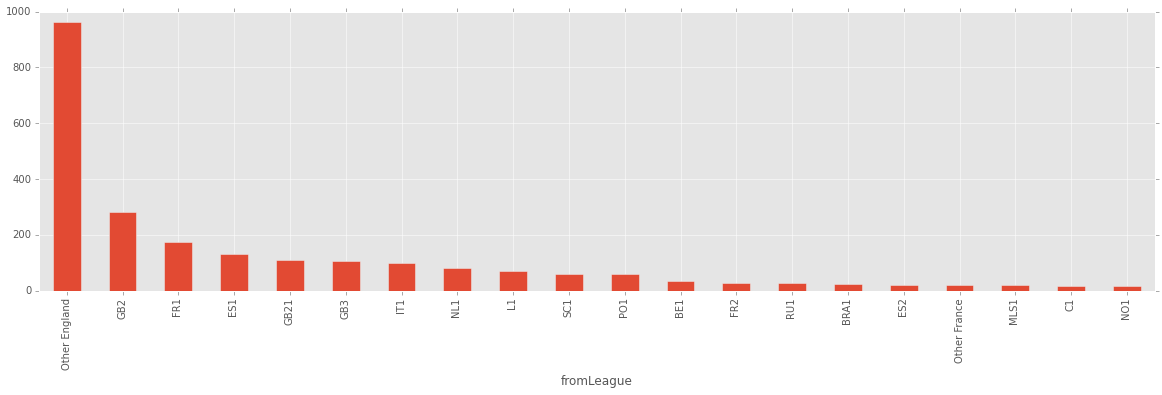

In [17]:
#number of transfers from each league to GB1 (English Premier) - first transfer to league only
transfers[((transfers['toLeague'] != transfers['fromLeague']))&(transfers['toLeague'] == 'GB1')&(transfers['season'] > 2000)].drop_duplicates(subset=['id'],keep='last').groupby('fromLeague')['id'].count().sort_values(ascending=False)[:20].plot.bar(figsize=(20,5))

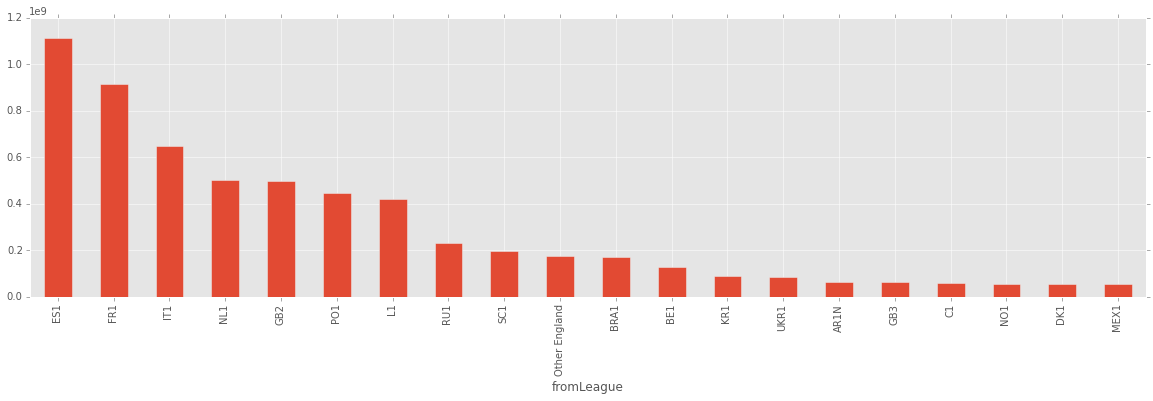

In [16]:
#total documented fees paid for transfers from each league to GB1 (English Premier) - first transfer to league only
transfers[((transfers['toLeague'] != transfers['fromLeague']))&(transfers['toLeague'] == 'GB1')&(transfers['season'] > 2000)].drop_duplicates(subset=['id'],keep='last').groupby('fromLeague')['feeValue'].sum().sort_values(ascending=False)[:20].plot.bar(figsize=(20,5))

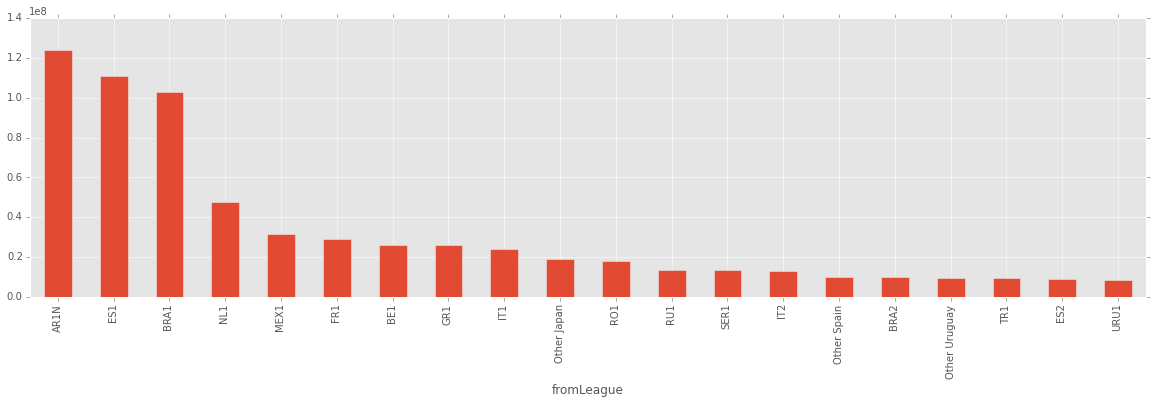

In [19]:
#total documented fees paid for transfers from each league to PO1 (Portuguese Top Tier) - first transfer to league only
transfers[((transfers['toLeague'] != transfers['fromLeague']))&(transfers['toLeague'] == 'PO1')&(transfers['season'] > 2000)].drop_duplicates(subset=['id'],keep='last').groupby('fromLeague')['feeValue'].sum().sort_values(ascending=False)[:20].plot.bar(figsize=(20,5))

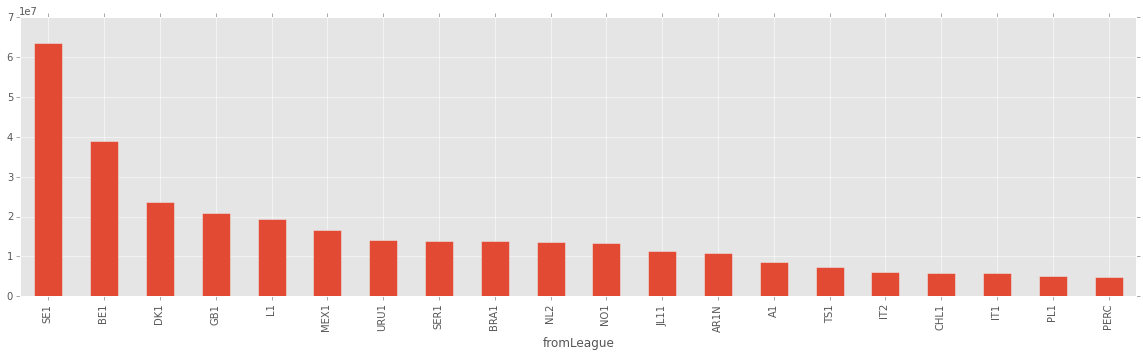

In [21]:
#total documented fees paid for transfers from each league to NL1 (Dutch Top Tier) - first transfer to league only
transfers[((transfers['toLeague'] != transfers['fromLeague']))&(transfers['toLeague'] == 'NL1')&(transfers['season'] > 2000)].drop_duplicates(subset=['id'],keep='last').groupby('fromLeague')['feeValue'].sum().sort_values(ascending=False)[:20].plot.bar(figsize=(20,5))

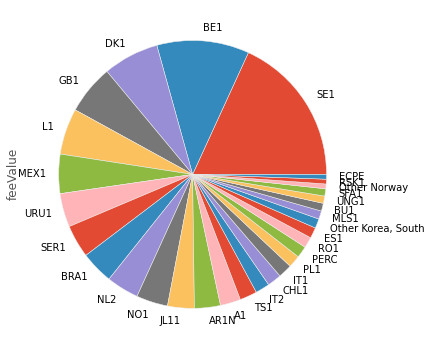

In [24]:
#total documented fees paid for transfers from each league to NL1 (Dutch Top Tier) - first transfer to league only
transfers[((transfers['toLeague'] != transfers['fromLeague']))&(transfers['toLeague'] == 'NL1')&(transfers['season'] > 2000)].drop_duplicates(subset=['id'],keep='last').groupby('fromLeague')['feeValue'].sum().sort_values(ascending=False)[:30].plot.pie(figsize=(6,6))

In [7]:
transfers

,id,playerName,date,season,fromCountry,fromLeague,fromTeamId,fromTeamName,toCountry,toLeague,toTeamId,toTeamName,mv,fee,feeValue,isLoan
0,4096,Jacob Burns,2014-07-01,2014,Australia,AUS1,970,Perth Glory,NaN,NaN,123,End of career,300000,-,NaN,False
1,4096,Jacob Burns,2009-07-01,2009,Romania,RO1,10442,Unirea Urziceni,Australia,AUS1,970,Perth Glory,400000,Free transfer,0,False
2,4096,Jacob Burns,2008-02-01,2007,Poland,PL1,422,Wisla Kraków,Romania,RO1,10442,Unirea Urziceni,450000,Free transfer,0,False
3,4096,Jacob Burns,2006-02-01,2005,England,GB3,349,Barnsley FC,Poland,PL1,422,Wisla Kraków,400000,100 Th. €,100000,False
4,4096,Jacob Burns,2004-01-01,2003,NaN,NaN,515,Unattached,England,GB3,349,Barnsley FC,NaN,-,NaN,False
5,4096,Jacob Burns,2003-07-01,2003,England,GB1,399,Leeds,NaN,NaN,515,Unattached,NaN,-,NaN,False
6,4096,Jacob Burns,2003-07-01,2003,England,GB2,399,Leeds,NaN,NaN,515,Unattached,NaN,-,NaN,False
7,4096,Jacob Burns,2000-07-01,2000,Australia,NaN,2500,Parra. Power,England,GB1,399,Leeds,NaN,375 Th. €,375000,False
8,4096,Jacob Burns,2000-07-01,2000,Australia,NaN,2500,Parra. Power,England,GB2,399,Leeds,NaN,375 Th. €,375000,False
9,4096,Jacob Burns,1999-07-01,1999,Australia,NaN,6045,Sydney United,Australia,NaN,2500,Parra. Power,NaN,?,NaN,False


In [8]:
players

,id,Display name,Name in home country,Date of birth,Place of birth,Country of birth,Age,Height,Nationality,Nationality 2,...,Date of last contract extension,Glove,Outfitter,Shoe model,Shoe size,day of death,facebook,instagram,twitter,website
0,4,Youri Djorkaeff,Youri Raffi Djorkaeff,1968-03-09,Lyon,France,48,1.79,France,Armenia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104,Fredi Bobic,Fredi Bobič,1971-10-30,Maribor,Jugoslawien (SFR),44,1.87,Germany,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.fredibobic.de
2,192,Markus Babbel,NaN,1972-09-08,München,Germany,43,1.91,Germany,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,205,Nils-Eric Johansson,NaN,1980-01-13,Stockholm,Sweden,36,1.87,Sweden,NaN,...,2015-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301,Thomas Gravesen,NaN,1976-03-11,Vejle,Denmark,40,1.78,Denmark,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,324,Stig Töfting,Stig Tøfting,1969-08-14,Aarhus,Denmark,46,1.76,Denmark,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,669,Brian O'Neil,NaN,1972-09-06,Paisley,Scotland,43,1.85,Scotland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,916,Christian Ziege,NaN,1972-02-01,Berlin,Germany,44,1.86,Germany,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,919,Dietmar Hamann,NaN,1973-08-27,Waldsassen,Germany,42,1.88,Germany,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1397,Michael Owen,Michael James Owen,1979-12-14,Chester,England,36,1.73,England,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/themichaelowen,https://www.michaelowen.com
